In [1]:
import numpy as np
from numpy.random import multivariate_normal
from matplotlib import transforms, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as mp3d
from scipy.spatial.transform import Rotation as R
%matplotlib inline

In [2]:
mu = np.array([0.0, 0.0, 0.0])
cov = np.array([[1,    0,  0],
                [ 0, .25,  0],
                [ 0,   0,  2]])
X = np.random.multivariate_normal(mu, cov, 50)
X = R.from_euler('x', 45, degrees=True).apply(X)

In [3]:
u, s, vh = np.linalg.svd(X)

In [4]:
GRAY3, GRAY7 = '#555655', '#929497'
# prepares 3D plot
def prepare_3d_plot():
    fig = plt.figure(figsize=(4.5, 4.5), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xlabel('x', color=GRAY3, fontsize=8)
    ax.set_ylabel('y', color=GRAY3, fontsize=8)
    ax.set_zlabel('z', color=GRAY3, fontsize=8)
    ax.w_xaxis.line.set_color(GRAY7)
    ax.w_yaxis.line.set_color(GRAY7)
    ax.w_zaxis.line.set_color(GRAY7)
    ax.view_init(34, -20)
    ax.set_aspect('equal')    
    ax.yaxis.labelpad=-15
    ax.xaxis.labelpad=-15
    ax.zaxis.labelpad=-15
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    frame1.axes.zaxis.set_ticklabels([])    
    return ax

In [5]:
#plt.scatter(X[:,0], X[:,1])
ort1 = np.cross(vh[0], vh[1])
ort1 /= np.linalg.norm(ort1)

#xx, yy = np.meshgrid(np.linspace(-3, 3, 2), np.linspace(-3, 3, 2))
#z = (-ort1[0]*xx - ort1[1]*yy) * 1. /ort1[2]
plane = np.array(
    [[-3, -3, 0],
     [3,  -3, 0],
     [3,   3, 0],
     [-3,  3, 0]])
plane[:,2] = (-ort1[0]*plane[:,0] - ort1[1]*plane[:,1]) * 1. /ort1[2]

In [6]:
prj = X - (X@ort1).reshape((-1, 1))*ort1

(-3, 3)

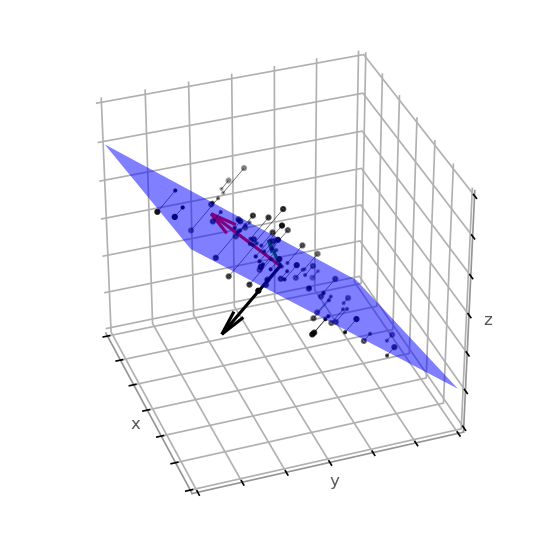

In [7]:
ax = prepare_3d_plot()
ax.scatter(X[:,0], X[:,1], X[:,2], color='black', s=4)
ax.quiver(0, 0, 0, *vh[0]*s[0]/5, color='r')
ax.quiver(0, 0, 0, *vh[1]*s[1]/5, color='g')
ax.quiver(0, 0, 0, *ort1*2, color='black')
face = mp3d.art3d.Poly3DCollection([plane], alpha=0.5)
alpha = 0.5
face.set_facecolor((0, 0, 1, alpha))
ax.add_collection3d(face)
ax.scatter(prj[:,0], prj[:,1], prj[:,2], color='black', s=1)
for i in range(X.shape[0]):
    ax.plot([X[i, 0], prj[i, 0]], [X[i, 1], prj[i, 1]], [X[i, 2], prj[i, 2]],
            color='black', linewidth=0.2)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

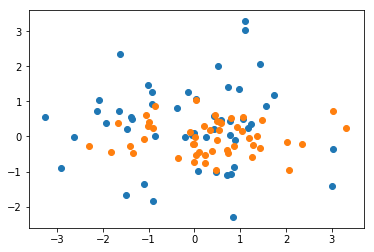

In [8]:
X_reduced = X @ vh[:2].T
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
X_reduced = X @ vh[1:3].T
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])

In [9]:
mu = np.array([0.0, 0.0, 0.0, 0.0])
cov = np.array([[1,   0, 0, 0],
                [ 0,.25, 0, 0],
                [ 0,  0, 2, 0],
                [ 0,  0, 0, 3]])
X = np.random.multivariate_normal(mu, cov, 50)

In [10]:
u, s, vh = np.linalg.svd(X)

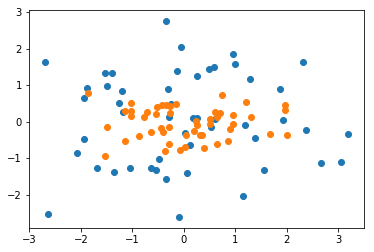

In [12]:
X_reduced = X @ vh[0:2].T
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
X_reduced = X @ vh[2:4].T
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])